## Swarm Optimizations Hands-on Applications
**FIZ371 - Scientific & Technical Computations | 24/05/2021**

* **Ant Colony Optimization**
* Artificial Bee Colony

Dr. Emre S. Tasci <emre.tasci@hacettepe.edu.tr>

# Ant Colony Optimization Application to the Travelling Salesman Problem

Start with $N$ cities, randomly placed on the map:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(371)

In [2]:
map_dimensions = 1000
N = 6

alpha = 1.0
beta = 1.1
Q = 10*N # Total pheromone per path
rho = 0.85 # Pheromone persistance coefficient (1-rho)'

# Place the cities
coords_cities = np.random.randint(0,map_dimensions,size=(N,2))
print(coords_cities)

# randomly initialize pheromones along the city paths
matrix_pher = np.random.rand(N,N)*10
# Symmetrize the matrix so that path A->B is equal to path B->A
matrix_pher = np.tril(matrix_pher) + np.tril(matrix_pher, -1).T
print("Path Pheromones:\n",matrix_pher)

# Calculate the distances
matrix_dist = np.zeros((N,N))
for i in range(N):
    for j in range(i+1,N):
        matrix_dist[i,j] = np.linalg.norm(coords_cities[i,:]-coords_cities[j,:])
# Symmetrize
matrix_dist += np.tril(matrix_dist.T)
with np.printoptions(precision=5):
    print("Distances:\n",matrix_dist)


[[973 593]
 [762 104]
 [956 140]
 [987 910]
 [ 51 737]
 [782 830]]
Path Pheromones:
 [[8.84969585 5.38073582 2.01990761 5.8648529  9.61690872 3.48805845]
 [5.38073582 7.33390833 5.91884546 5.58403651 8.95082769 7.54045035]
 [2.01990761 5.91884546 0.54368606 3.37227274 1.96539267 1.23654   ]
 [5.8648529  5.58403651 3.37227274 4.22983271 5.05377141 5.48096872]
 [9.61690872 8.95082769 1.96539267 5.05377141 0.44725157 3.9099071 ]
 [3.48805845 7.54045035 1.23654    5.48096872 3.9099071  8.89422756]]
Distances:
 [[   0.       532.58051  453.31887  317.309    933.17737  304.38463]
 [ 532.58051    0.       197.31194  836.81599  951.95063  726.27543]
 [ 453.31887  197.31194    0.       770.62377 1084.17434  711.60101]
 [ 317.309    836.81599  770.62377    0.       951.85346  220.05681]
 [ 933.17737  951.95063 1084.17434  951.85346    0.       736.89212]
 [ 304.38463  726.27543  711.60101  220.05681  736.89212    0.     ]]


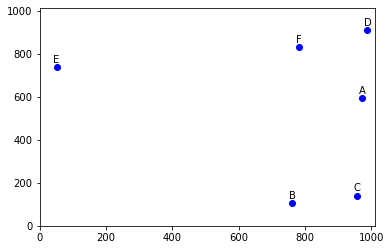

In [3]:
alphabet = np.array(list(map(chr, range(65, 91))))

# Show them on the map
fig,ax = plt.subplots()
plt.plot(coords_cities[:,0],coords_cities[:,1],"ob")
plt.xlim(0,map_dimensions+10)
plt.ylim(0,map_dimensions+10)

# Positions for labels - scaled
x_left = np.round(3*map_dimensions/300)
y_up = np.round(7*map_dimensions/300)

# Label the cities correspondingly
for i in range(N):
    ax.annotate(alphabet[i],(coords_cities[i,0]-x_left,\
                             coords_cities[i,1]+y_up))
plt.show()

In [4]:
def send_the_ant():
    global matrix_pher
    # Start from a random city
    city_start = np.random.randint(N)
    #d#print("Starting City: {:} (#{:})\n".format(alphabet[city_start],city_start))
    city_sequence = [city_start]
    city_from = city_start
    # At the beginning we haven't visited any cities yet
    # -- except the city we are starting from
    cities_not_visited = np.arange(N)
    cities_not_visited = np.delete(cities_not_visited,\
                                   np.where(cities_not_visited == city_start))

    while (len(cities_not_visited)):
        # Calculate the possibilities
        possibilities = []
        for city_possible in cities_not_visited:
            pher_this = matrix_pher[city_start,city_possible]
            dist_this = matrix_dist[city_start,city_possible]
            p_this = pher_this**alpha / dist_this**beta
            possibilities.append(p_this)
        possibilities /= sum(possibilities)
        #print(cities_not_visited)
        #print(alphabet[cities_not_visited])
        #d#print("Possible Destinations: {:}".format((", ".join(alphabet[cities_not_visited]))))

        #d#with np.printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)}):
            #d#print("Possibilities: ",possibilities)

        # Choose one city in accordance with the possibilities
        city_chosen = np.random.choice(cities_not_visited,p=possibilities)
        city_to = city_chosen
        city_sequence.append(city_chosen)
        #d#print("Next City Chosen: {:} (#{:})".format(alphabet[city_chosen],city_chosen))
        cities_not_visited = np.delete(cities_not_visited,\
                                   np.where(cities_not_visited == city_chosen))
        #d#print("")
        #d#print(city_from,"->",city_to)

        # Increase pheromone in the visited path
        matrix_pher[city_from,city_to] += Q / matrix_dist[city_from,city_to]
        matrix_pher[city_to,city_from] = matrix_pher[city_from,city_to]
        #print(matrix_pher)
        city_from = city_to
    #d#print("Travel Sequence: {:}".format("->".join(alphabet[city_sequence])))

    # Evaporate pheromone
    matrix_pher *= rho

In [5]:
for i in range(100000):
    send_the_ant()

In [6]:
with np.printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)}):
    print(matrix_pher)

[[0.0000 0.1988 0.1255 0.7894 0.0124 0.2133]
 [0.1988 0.0000 0.9595 0.1165 0.1449 0.1634]
 [0.1255 0.9595 0.0000 0.1085 0.0965 0.2962]
 [0.7894 0.1165 0.1085 0.0000 0.0356 0.5981]
 [0.0124 0.1449 0.0965 0.0356 0.0000 0.1387]
 [0.2133 0.1634 0.2962 0.5981 0.1387 0.0000]]


In [7]:
# Calculate most efficient path:
winning_path = ""
winning_dist = 1E10
winning_seq = []
for starting_city in range(N):
    pher_clone = np.copy(matrix_pher)
    total_distance = 0
    print("Starting from: {:} (#{:})".\
          format(alphabet[starting_city],starting_city))
    seq = [starting_city]
    this_city = starting_city
    for i in range(N-1):
        next_city = pher_clone[this_city,:].argmax()
        seq.append(next_city)
        print("\t{:} -> {:} ({:.2f})".format(alphabet[this_city],
                                             alphabet[next_city],
                                matrix_dist[this_city,next_city]))
        total_distance += matrix_dist[this_city,next_city]
        pher_clone[:,this_city] = 0.0
        pher_clone[:,next_city] = 0.0
        this_city = next_city
    this_path = " -> ".join(alphabet[seq])
    if(total_distance < winning_dist):
        winning_dist = total_distance
        winning_path = this_path
        winning_seq = seq
    print(this_path)
    print("Total Distance: {:.2f} units.".format(total_distance))
    print("")
print("Winning Path: {:} ({:.2f} units)".format(winning_path,winning_dist))

Starting from: A (#0)
	A -> D (317.31)
	D -> F (220.06)
	F -> C (711.60)
	C -> B (197.31)
	B -> E (951.95)
A -> D -> F -> C -> B -> E
Total Distance: 2398.23 units.

Starting from: B (#1)
	B -> C (197.31)
	C -> F (711.60)
	F -> D (220.06)
	D -> A (317.31)
	A -> E (933.18)
B -> C -> F -> D -> A -> E
Total Distance: 2379.46 units.

Starting from: C (#2)
	C -> B (197.31)
	B -> A (532.58)
	A -> D (317.31)
	D -> F (220.06)
	F -> E (736.89)
C -> B -> A -> D -> F -> E
Total Distance: 2004.15 units.

Starting from: D (#3)
	D -> A (317.31)
	A -> F (304.38)
	F -> C (711.60)
	C -> B (197.31)
	B -> E (951.95)
D -> A -> F -> C -> B -> E
Total Distance: 2482.56 units.

Starting from: E (#4)
	E -> B (951.95)
	B -> C (197.31)
	C -> F (711.60)
	F -> D (220.06)
	D -> A (317.31)
E -> B -> C -> F -> D -> A
Total Distance: 2398.23 units.

Starting from: F (#5)
	F -> D (220.06)
	D -> A (317.31)
	A -> B (532.58)
	B -> C (197.31)
	C -> E (1084.17)
F -> D -> A -> B -> C -> E
Total Distance: 2351.43 units.

Win

In [8]:
with np.printoptions(formatter={'float': lambda x: "{0:7.2f}".format(x)}):
    print(matrix_dist)


[[   0.00  532.58  453.32  317.31  933.18  304.38]
 [ 532.58    0.00  197.31  836.82  951.95  726.28]
 [ 453.32  197.31    0.00  770.62 1084.17  711.60]
 [ 317.31  836.82  770.62    0.00  951.85  220.06]
 [ 933.18  951.95 1084.17  951.85    0.00  736.89]
 [ 304.38  726.28  711.60  220.06  736.89    0.00]]


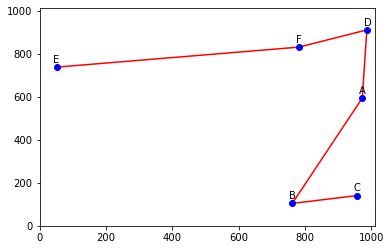

In [9]:
# Show them on the map
fig,ax = plt.subplots()
for i in range(N-1):
    plt.plot([coords_cities[winning_seq[i],0],coords_cities[winning_seq[i+1],0]],\
             [coords_cities[winning_seq[i],1],coords_cities[winning_seq[i+1],1]],\
            "r-")
plt.plot(coords_cities[:,0],coords_cities[:,1],"ob")
plt.xlim(0,map_dimensions+10)
plt.ylim(0,map_dimensions+10)

# Positions for labels - scaled
x_left = np.round(3*map_dimensions/300)
y_up = np.round(7*map_dimensions/300)

# Label the cities correspondingly
for i in range(N):
    ax.annotate(alphabet[i],(coords_cities[i,0]-x_left,\
                             coords_cities[i,1]+y_up))
plt.show()

In [10]:
def calc_dist(seq):
    total_distance = 0
    for i in range(len(seq)-1):
        total_distance += matrix_dist[seq[i],seq[i+1]]
    return total_distance

In [11]:
calc_dist(winning_seq)

2004.1503769979772

In [12]:
calc_dist([1,2,0,3,5,4])

1924.8887389707297